In [4]:
import numpy as np
import matplotlib.pyplot as plt
import math
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
import random

# $E \times B$ Drift

Here we use a simple implementation of the lorentz force on one particle, using the Boris or Leapfrom algorithm

In [33]:
# This will be our charged particle class
class ChargedParticle:
    def __init__(self, mass, charge, postion, velocity):
        self.m = mass
        self.q = charge
        self.r = np.array(postion)
        self.v = np.array(velocity)
        
    def v_r_step(self, dt, E, B):
        # Boris Algorithm
        v_minus = (dt*self.q*E)/(2*self.m) + self.v
        c = (dt*self.q)/(2*self.m)
        
        #solve for v_plus through system of linear equations
        a = np.array([[1, -c*B[2], c*B[1]],[c*B[2], 1, -c*B[0]], [-c*B[1], c*B[0], 1]])
        b = c * np.cross(v_minus, B) + v_minus
        v_plus =np.linalg.solve(a, b)
        
        v_new = v_plus + (dt*self.q*E)/(2*self.m)

        
        # below is a second version of the Boris Alg using matrix idenities?
        # does it work? Kind of.       
#         v_new=[]
#         Omega = (self.q*B)/self.m
#         Sigma = (self.q*E)/self.m
#         A = np.array((Omega*dt)/2)
#         C = np.array(self.v + dt*(Sigma + np.cross(self.v, Omega/2)))
#         v_new=(C + A*np.dot(A, C) - np.cross(A, C))/(1+np.dot(A, A))

        #Step and replace position and velocity
        r_new = self.r + v_new*dt
        self.v = np.array(v_new)
        self.r = np.array(r_new)

In [34]:
## Initialise particle properties
particles=[]
num_particles=3
q = 1
m = 1

#Initialise B field
B=np.array([0, 0, 5])

E=np.array([0, 1, 0])
#create particle
particle = ChargedParticle(m, q, [1, 1, 1], [2,0, 0])

In [35]:
#iterate through steps0
T=0
V=[]
R=[]
dt=.005
time=[]

#lets iterate through time expose our particle to E and B
while T<14:
    time.append(T)


    particle.v_r_step(dt, E, B)
        
    R.append(particle.r)
    V.append(particle.v)
    T=T+dt


In [36]:
R=np.transpose(np.array(R))
V=np.transpose(np.array(V))

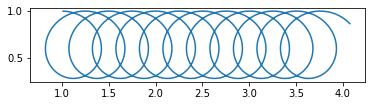

In [37]:
plt.plot(R[0], R[1])
plt.gca().set_aspect('equal')
plt.show()

This is the classic trajectory expected from $E\times B$ drift